In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files

## Importar Dataset con Kaggle
Para correr este notebook se necesita estar loggeado en Kaggle y generar un API token, el cual se sube al colab y eso es todo

In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"emanuellopezh","key":"9e92f4016ee320bb5aa6c26f66053db1"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download pralabhpoudel/world-energy-consumption
!unzip world-energy-consumption.zip

Dataset URL: https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption
License(s): Attribution 4.0 International (CC BY 4.0)
world-energy-consumption.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  world-energy-consumption.zip
replace World Energy Consumption.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
df = pd.read_csv('World Energy Consumption.csv')

## Análisis exploratorio de los datos (EDA)

In [ ]:
df.head(10)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN
5,ASEAN (Ember),2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.02,NaN,0.004,NaN
6,ASEAN (Ember),2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.05,NaN,0.009,NaN
7,ASEAN (Ember),2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.06,NaN,0.011,NaN
8,ASEAN (Ember),2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.06,NaN,0.010,NaN
9,ASEAN (Ember),2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002,NaN,NaN,NaN,NaN,NaN,0.07,NaN,0.011,NaN


In [ ]:
missing_values = df.isnull().sum() / len(df) * 100
high_missing_values = missing_values[missing_values > 50]
print("Columnas con más del 50% de valores faltantes:")
print(high_missing_values)

Columnas con más del 50% de valores faltantes:
biofuel_cons_change_pct    92.063420
biofuel_cons_change_twh    87.793022
biofuel_cons_per_capita    89.542068
biofuel_consumption        87.429584
biofuel_elec_per_capita    76.035799
                             ...    
wind_elec_per_capita       67.903871
wind_electricity           63.674359
wind_energy_per_capita     81.532800
wind_share_elec            68.717063
wind_share_energy          81.369253
Length: 112, dtype: float64


### Filtrado de los paises a los que vamos a evaluar

In [ ]:
df = df[df['country'].isin(['Panama' , 'Colombia', 'Venezuela', 'Ecuador'])]

### Definición de funciones para gráficos

In [ ]:
def plot_features_by_country(df, features):
    """
    Genera subplots para cada feature, visualizando su evolución temporal
    por país en distintos colores (sin puntos, solo líneas continuas), y
    mostrando los años en el eje X en todas las gráficas.
    """
    countries = df['country'].unique()
    colors = plt.cm.tab20.colors

    fig, axes = plt.subplots(len(features), 1, figsize=(12, 5 * len(features)), sharex=True)

    if len(features) == 1:
        axes = [axes]

    for i, feature in enumerate(features):
        for j, country in enumerate(countries):
            df_country = df[df['country'] == country]
            color = colors[j % len(colors)]
            axes[i].plot(
                df_country['year'],
                df_country[feature],
                label=country if i == 0 else "",
                color=color
            )

        axes[i].set_title(feature.replace('_', ' ').title())
        axes[i].grid(True)
        axes[i].tick_params(axis='x', labelrotation=45)

    # Añadir leyenda solo al primer subplot
    axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xlabel('Año')
    plt.tight_layout()
    plt.show()

def graficar_correlacion(df, pais, columnas):
    """
    Genera el mapa de calor para la correlación de las columnas seleccionadas.
    """
    df_pais = df[df['country'] == pais].copy()

    # Limpiar datos antes de calcular la correlación
    df_pais = df_pais.sort_values("year")
    df_pais = df_pais.interpolate(method='linear', limit_direction='both')
    df_pais = df_pais.fillna(method='bfill').fillna(method='ffill')

    # Correlación de las columnas seleccionadas
    corr = df_pais[columnas].corr()

    # Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title(f"Mapa de Correlación - {pais}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def graficar_correlaciones_por_pais(df, lista_paises, columnas):
    for pais in lista_paises:
        print(f"→ Correlación para {pais}")
        graficar_correlacion(df, pais, columnas)

def graficar_torta_energia(df, pais, year, columnas_energia):
    """
    Genera un gráfico de torta para la energía eléctrica producida en un país en un año específico.
    """
    df_pais = df[(df['country'] == pais) & (df['year'] == year)].copy()

    if df_pais.empty:
        print(f"No hay datos para {pais} en el año {year}")
        return

    energia = df_pais[columnas_energia].iloc[0]
    energia = energia.dropna()
    energia = energia[energia > 0]

    plt.figure(figsize=(4, 4))
    plt.pie(energia.values, labels=energia.index, startangle=140)
    plt.title(f'Distribución de fuentes de electricidad en {pais} - {year}')
    plt.axis('equal')
    plt.show()

### Generación de gráficos
definicion de variables y gráficos

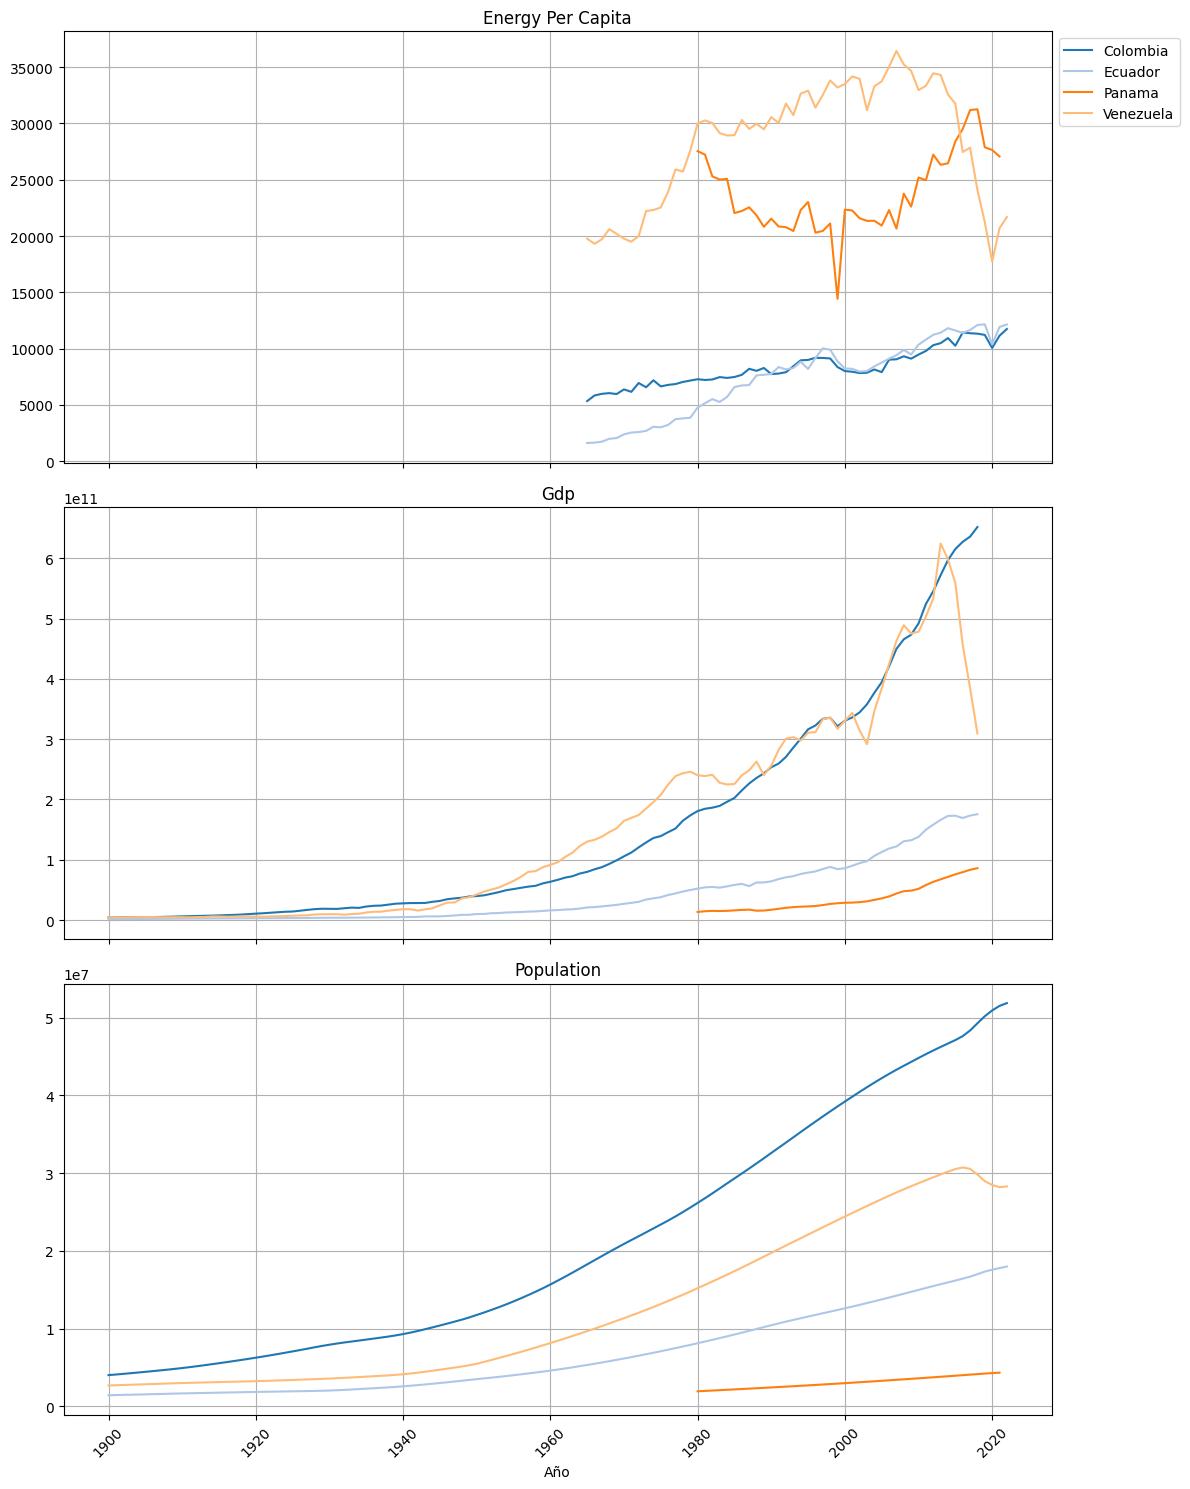

None


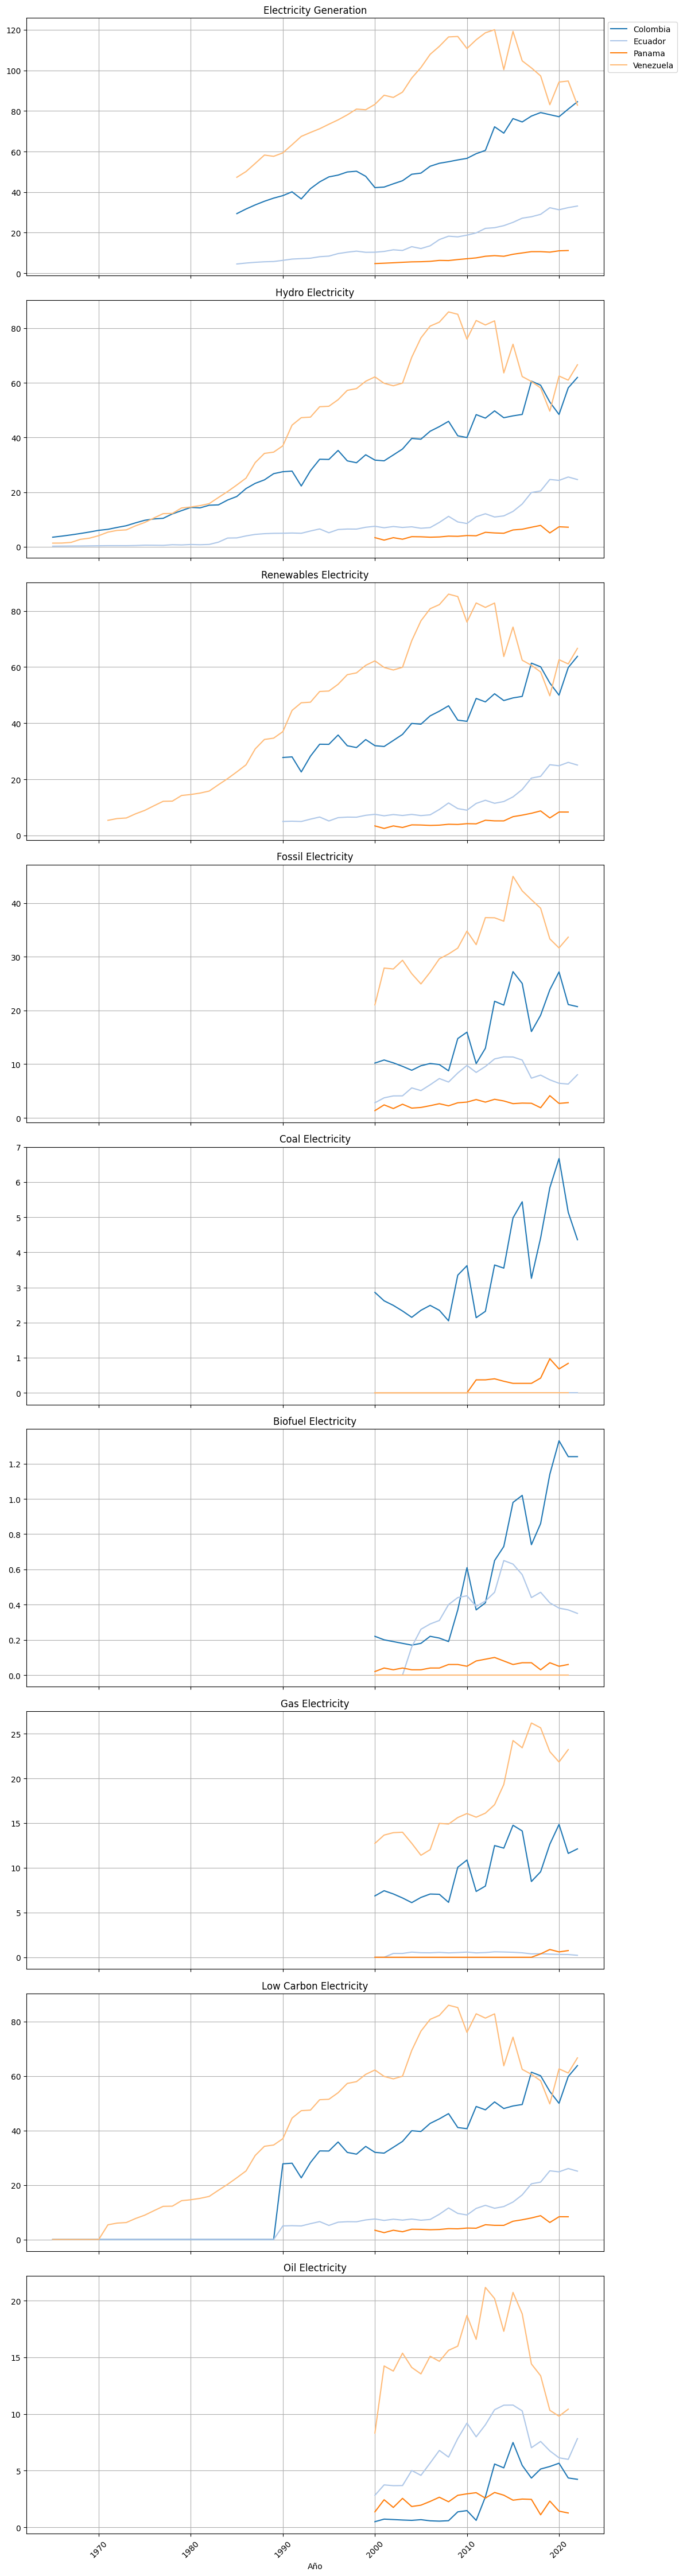

None


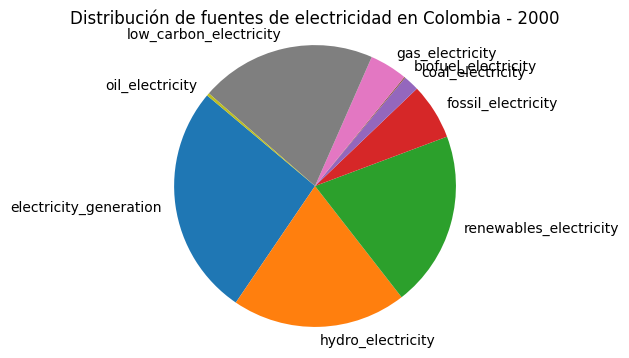

None


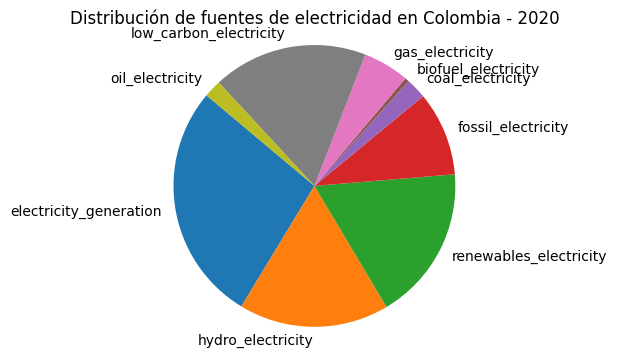

None


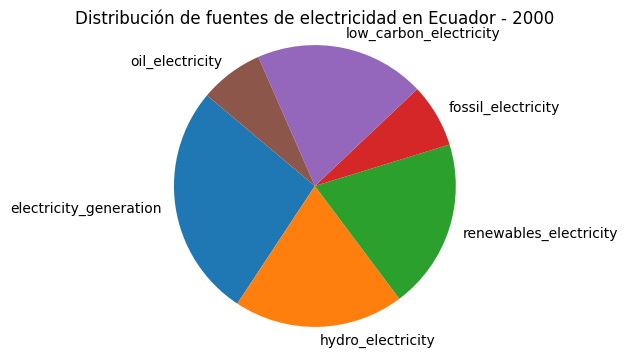

None


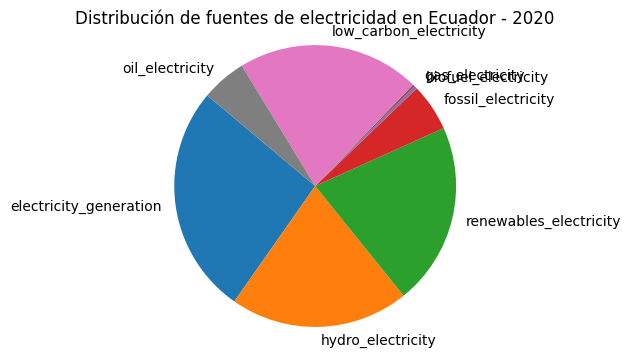

None


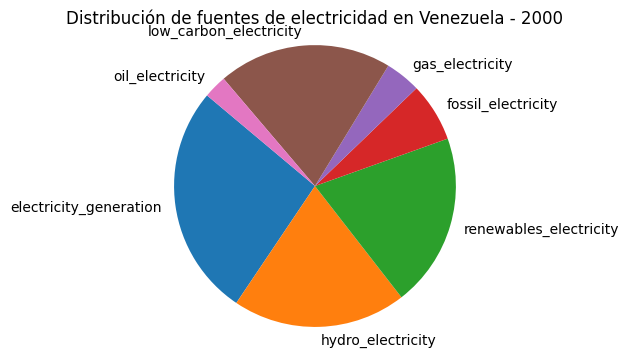

None


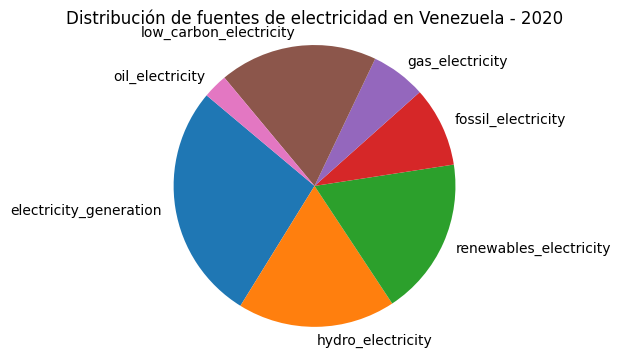

None


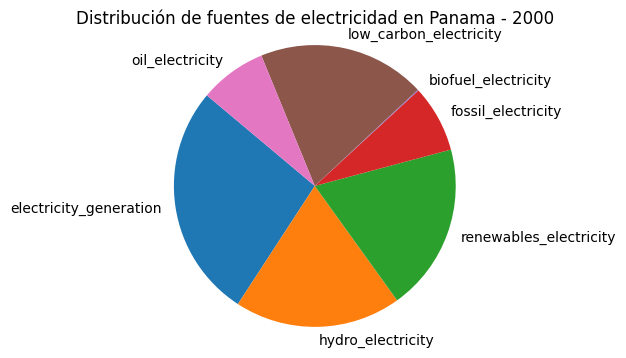

None


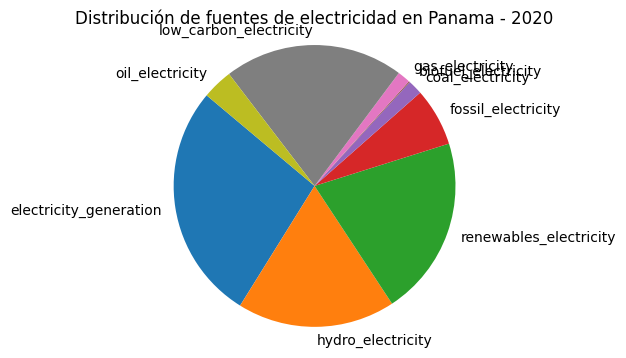

None


In [ ]:
energy = [
    'electricity_generation',
    'hydro_electricity',
    'renewables_electricity',
    'fossil_electricity',
    'coal_electricity',
    'biofuel_electricity',
    'gas_electricity',
    'low_carbon_electricity',
    'oil_electricity',
]

other = [
    'energy_per_capita',
    'gdp',
    'population',
         ]

correlacion = [
    'electricity_generation',
    'primary_energy_consumption',
    'population',
    'gdp',
    'energy_per_capita',
    'energy_cons_change_pct',
    'carbon_intensity_elec',
    'coal_share_energy',
    'oil_share_energy',
    'gas_share_energy',
    'renewables_share_energy'
]

print(plot_features_by_country(df, other))
print(plot_features_by_country(df, energy))
print(graficar_torta_energia(df, 'Colombia', 2000, energy))
print(graficar_torta_energia(df, 'Colombia', 2020, energy))
print(graficar_torta_energia(df, 'Ecuador', 2000, energy))
print(graficar_torta_energia(df, 'Ecuador', 2020, energy))
print(graficar_torta_energia(df, 'Venezuela', 2000, energy))
print(graficar_torta_energia(df, 'Venezuela', 2020, energy))
print(graficar_torta_energia(df, 'Panama', 2000, energy))
print(graficar_torta_energia(df, 'Panama', 2020, energy))

→ Correlación para Panama


/tmp/ipython-input-20-4170225838.py:44: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_pais = df_pais.interpolate(method='linear', limit_direction='both')
/tmp/ipython-input-20-4170225838.py:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pais = df_pais.fillna(method='bfill').fillna(method='ffill')


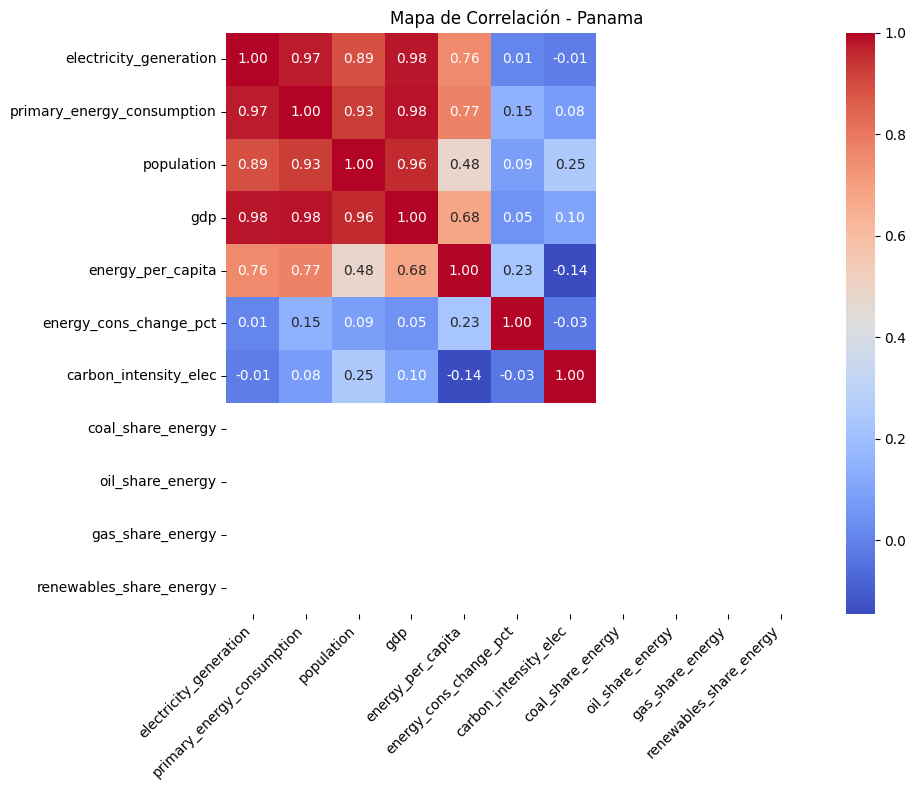

→ Correlación para Colombia


/tmp/ipython-input-20-4170225838.py:44: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_pais = df_pais.interpolate(method='linear', limit_direction='both')
/tmp/ipython-input-20-4170225838.py:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pais = df_pais.fillna(method='bfill').fillna(method='ffill')


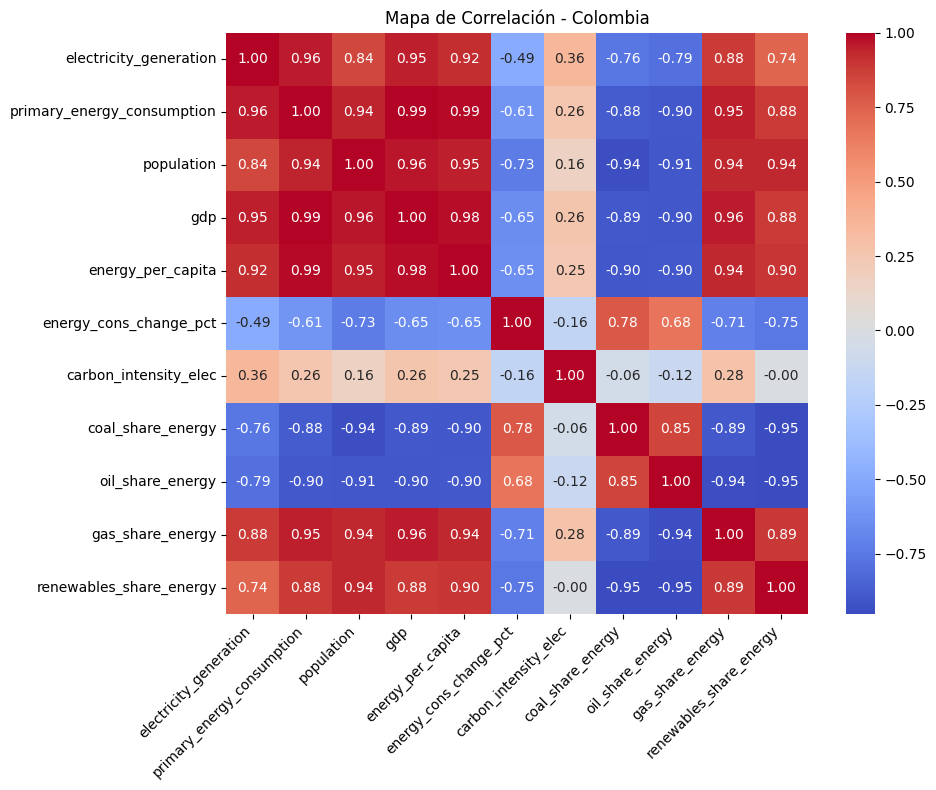

→ Correlación para Venezuela


/tmp/ipython-input-20-4170225838.py:44: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_pais = df_pais.interpolate(method='linear', limit_direction='both')
/tmp/ipython-input-20-4170225838.py:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pais = df_pais.fillna(method='bfill').fillna(method='ffill')


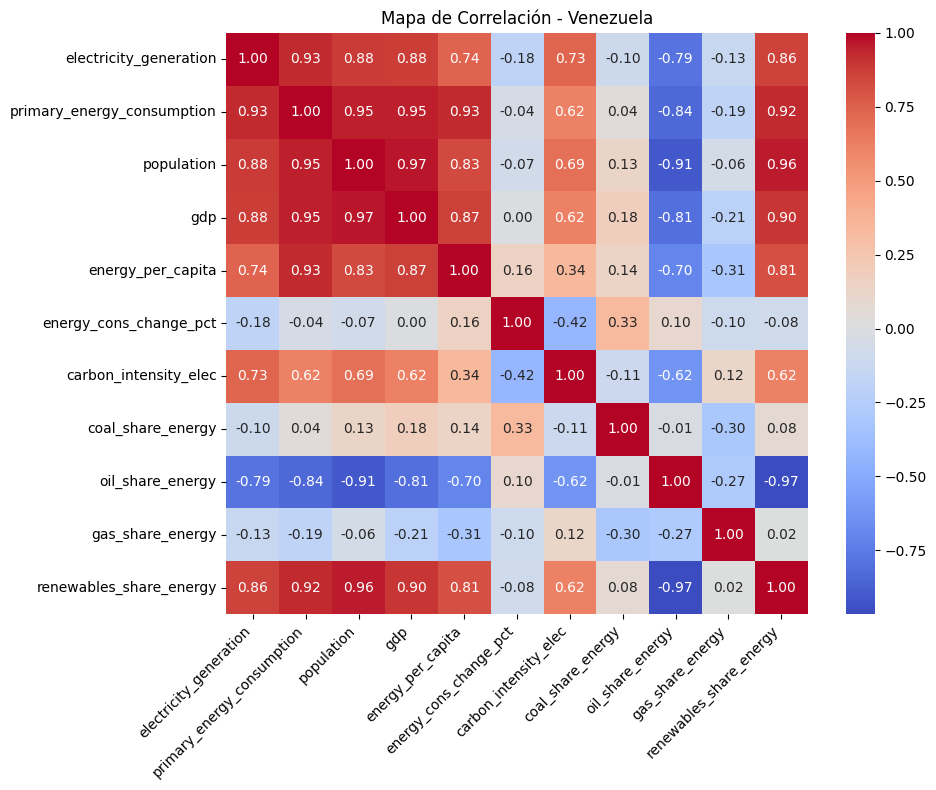

→ Correlación para Ecuador


/tmp/ipython-input-20-4170225838.py:44: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_pais = df_pais.interpolate(method='linear', limit_direction='both')
/tmp/ipython-input-20-4170225838.py:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pais = df_pais.fillna(method='bfill').fillna(method='ffill')


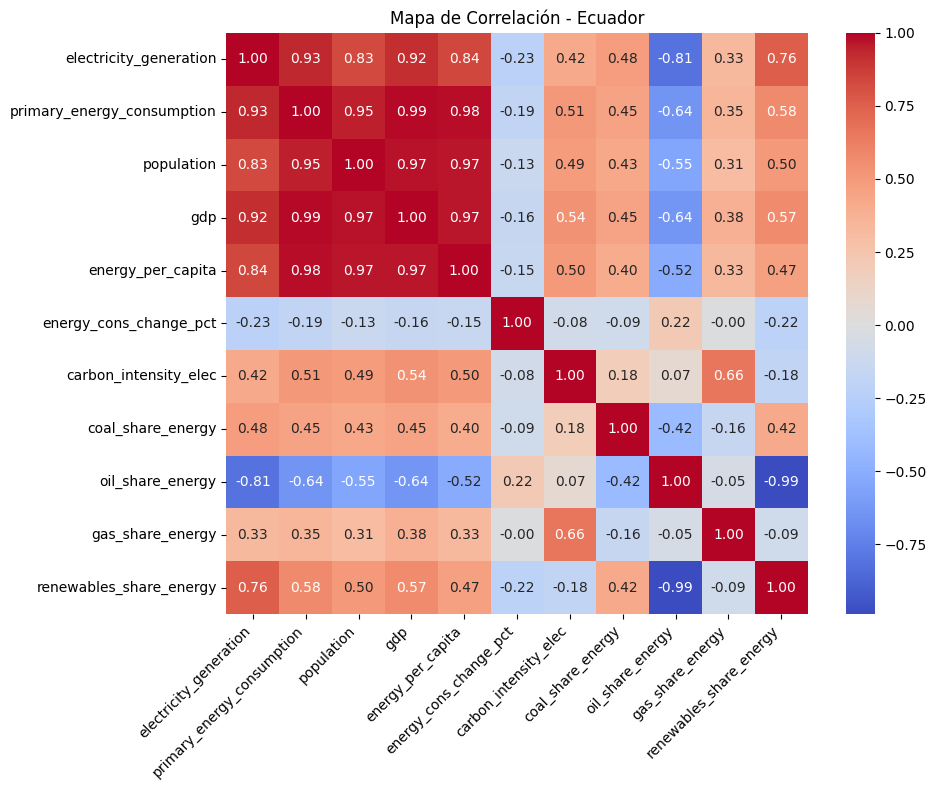

In [ ]:
graficar_correlaciones_por_pais(df, ['Panama', 'Colombia', 'Venezuela', 'Ecuador'], correlacion)